<a href="https://colab.research.google.com/github/guru3/ML-Insights/blob/master/4_Importance_of_output_encoding_in_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### We will try to understand the importance of how output of a network is encoded. In this case, we will try digit classification, with two separate models with first having 10 output nodes, one for each of 10 digits and another model having 4 output nodes, as binary encoding of the 10 digits. 
#### Assumption before starting the experiment is that model with 10 separate output nodes would be easier to converge

In [0]:
%matplotlib inline

from keras.datasets import mnist
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [0]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = mnist.load_data()

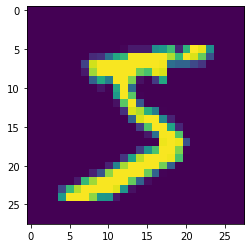

In [0]:
#Let's look at one example
_ = plt.imshow(x_train_raw[0])

In [0]:
print(x_train_raw.shape, y_train_raw.shape) #we will have to change categorical

(60000, 28, 28) (60000,)


In [0]:
training_examples = 50000
validation_examples = 10000
testing_examples = y_test_raw.shape[0]

In [0]:
#data normalization
x_train_imd = x_train_raw/255
x_test_imd = x_test_raw/255
x_train_imd = x_train_imd.reshape(x_train_imd.shape[0],x_train_imd.shape[1],x_train_imd.shape[2],1)
x_test_imd = x_test_imd.reshape(x_test_imd.shape[0],x_train_imd.shape[1],x_train_imd.shape[2],1)

total_classes = 10 #number of digits
encoded_digits = 4
y_train_imd = keras.utils.to_categorical(y_train_raw, total_classes)
y_test_imd = keras.utils.to_categorical(y_test_raw, total_classes)

In [0]:
def get_data_10():
    permutation = np.random.permutation(x_train_imd.shape[0])
    
    X_train_, X_valid_ = x_train_imd[:training_examples], x_train_imd[training_examples:]
    Y_train_, Y_valid_ = y_train_imd[:training_examples], y_train_imd[training_examples:]
    
    return( (X_train_, Y_train_), (X_valid_, Y_valid_), (x_test_imd, y_test_imd) )

def num_array_to_encoded(arr):
    return np.array([ np.array([ int(x) for x in np.binary_repr(i).zfill(encoded_digits) ]) for i in arr ])

def get_data_4():
    permutation = np.random.permutation(x_train_imd.shape[0])
    X_train_, X_valid_ = x_train_imd[:training_examples], x_train_imd[training_examples:]

    Y_train_ = num_array_to_encoded( y_train_raw[:training_examples] )
    Y_valid_ = num_array_to_encoded( y_train_raw[training_examples:] )
    Y_test_  = num_array_to_encoded( y_test_raw )
    
    return( (X_train_, Y_train_), (X_valid_, Y_valid_), (x_test_imd, Y_test_) )

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 7s 139us/step - loss: 0.2506 - accuracy: 0.9214 - val_loss: 0.0774 - val_accuracy: 0.9774
Epoch 2/15
50000/50000 [==============================] - 5s 106us/step - loss: 0.0650 - accuracy: 0.9806 - val_loss: 0.0636 - val_accuracy: 0.9821
Epoch 3/15
50000/50000 [==============================] - 5s 107us/step - loss: 0.0472 - accuracy: 0.9847 - val_loss: 0.0479 - val_accuracy: 0.9863
Epoch 4/15
50000/50000 [==============================] - 5s 107us/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0521 - val_accuracy: 0.9855
Epoch 5/15
50000/50000 [==============================] - 5s 107us/step - loss: 0.0280 - accuracy: 0.9915 - val_loss: 0.0591 - val_accuracy: 0.9826
Epoch 6/15
50000/50000 [==============================] - 5s 107us/step - loss: 0.0226 - accuracy: 0.9927 - val_loss: 0.0464 - val_accuracy: 0.9875
Epoch 7/15
50000/50000 [==============================] - 5s 1

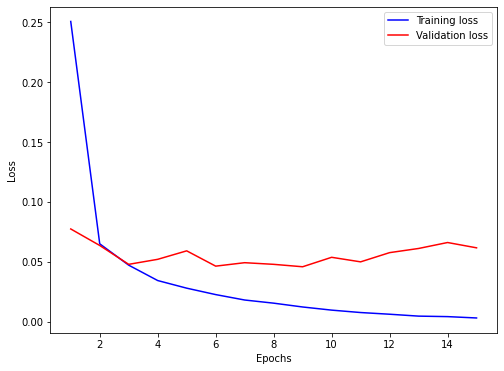

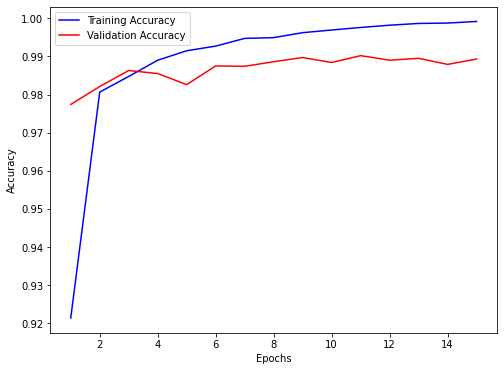

In [0]:
# Model with 10 outputs
(X_train, Y_train), (X_valid,Y_valid), (X_test,Y_test) = get_data_10()

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) ))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(total_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=128, epochs=15, 
                  validation_data=(X_valid,Y_valid))
score = model.evaluate(X_test,Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(8,6))
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(loss)+1), loss, 'b', label='Training loss')
plt.plot(range(1, len(val_loss)+1), val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
plt.plot(range(1, len(loss)+1), loss, 'b', label='Training Accuracy')
plt.plot(range(1, len(val_loss)+1), val_loss, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 6s 118us/step - loss: 0.3615 - accuracy: 0.7872 - val_loss: 0.2964 - val_accuracy: 0.8108
Epoch 2/30
50000/50000 [==============================] - 6s 111us/step - loss: 0.2831 - accuracy: 0.8150 - val_loss: 0.2832 - val_accuracy: 0.8138
Epoch 3/30
50000/50000 [==============================] - 5s 108us/step - loss: 0.2714 - accuracy: 0.8182 - val_loss: 0.2743 - val_accuracy: 0.8154
Epoch 4/30
50000/50000 [==============================] - 6s 114us/step - loss: 0.2662 - accuracy: 0.8192 - val_loss: 0.2708 - val_accuracy: 0.8155
Epoch 5/30
50000/50000 [==============================] - 6s 111us/step - loss: 0.2630 - accuracy: 0.8200 - val_loss: 0.2770 - val_accuracy: 0.8144
Epoch 6/30
50000/50000 [==============================] - 6s 110us/step - loss: 0.2608 - accuracy: 0.8205 - val_loss: 0.2720 - val_accuracy: 0.8156
Epoch 7/30
50000/50000 [==============================] - 5s 1

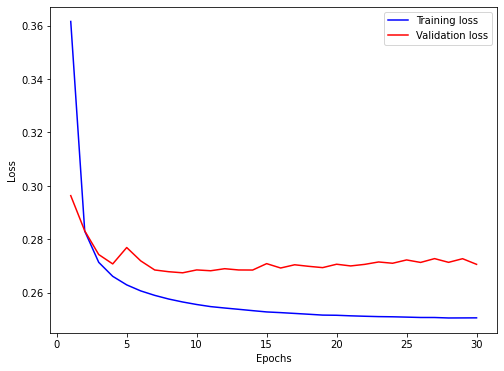

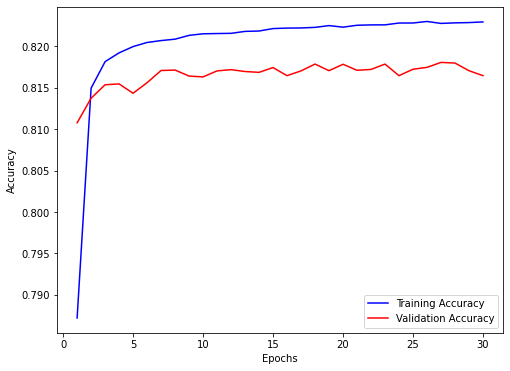

In [0]:
# Model with 4 outputs
(X_train, Y_train), (X_valid,Y_valid), (X_test,Y_test) = get_data_4()

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) ))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(encoded_digits, activation='softmax'))
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=128, epochs=30, 
                  validation_data=(X_valid,Y_valid))
score = model.evaluate(X_test,Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(8,6))
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(loss)+1), loss, 'b', label='Training loss')
plt.plot(range(1, len(val_loss)+1), val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
plt.plot(range(1, len(loss)+1), loss, 'b', label='Training Accuracy')
plt.plot(range(1, len(val_loss)+1), val_loss, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
model_4 = model

#### Well we see that we are unable to achieve same level of accuracy as we got with 10 one hot encoded vectors! 
#### What if we add another layer in the encoded model with 10 outputs and try to optimize that? That should improve our accuracy ideally. Then let's also double check how encoded values look in that particular model!

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 6s 121us/step - loss: 1.7086 - accuracy: 0.3619 - val_loss: 1.4317 - val_accuracy: 0.4099
Epoch 2/30
50000/50000 [==============================] - 6s 111us/step - loss: 1.3378 - accuracy: 0.4047 - val_loss: 1.2683 - val_accuracy: 0.4025
Epoch 3/30
50000/50000 [==============================] - 6s 111us/step - loss: 1.2416 - accuracy: 0.4073 - val_loss: 1.2103 - val_accuracy: 0.4038
Epoch 4/30
50000/50000 [==============================] - 6s 110us/step - loss: 1.1977 - accuracy: 0.4090 - val_loss: 1.1843 - val_accuracy: 0.4058
Epoch 5/30
50000/50000 [==============================] - 6s 111us/step - loss: 1.1717 - accuracy: 0.4110 - val_loss: 1.1637 - val_accuracy: 0.4076
Epoch 6/30
50000/50000 [==============================] - 5s 110us/step - loss: 1.1363 - accuracy: 0.4787 - val_loss: 1.1210 - val_accuracy: 0.5170
Epoch 7/30
50000/50000 [==============================] - 6s 1

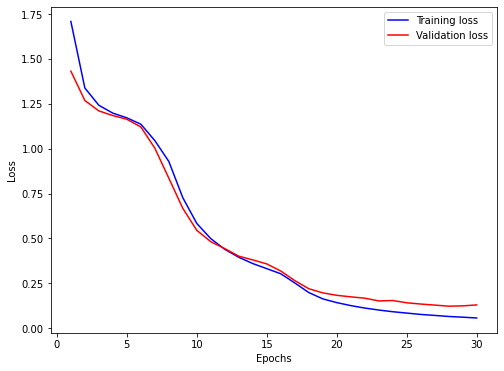

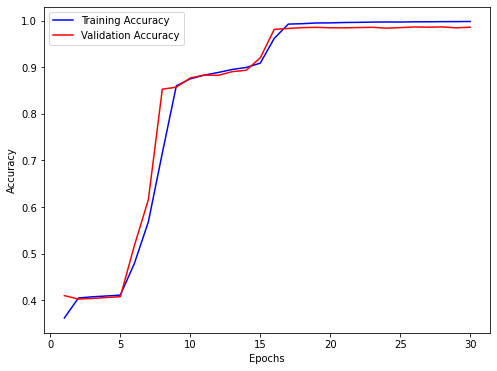

In [0]:
# Encoded model with added layer for 10 outputs
(X_train, Y_train), (X_valid,Y_valid), (X_test,Y_test) = get_data_10()

model_10 = Sequential()
model_10.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) ))
model_10.add(Conv2D(32, (3, 3), activation='relu'))
model_10.add(MaxPooling2D((2, 2)))
model_10.add(Conv2D(16, (3, 3), activation='relu'))
model_10.add(Flatten())
model_10.add(Dense(32, activation='relu'))
model_10.add(Dense(encoded_digits, activation='softmax'))
model_10.add(Dense(total_classes, activation='softmax'))
model_10.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model_10.fit(X_train, Y_train, batch_size=128, epochs=30, 
                  validation_data=(X_valid,Y_valid))
score = model_10.evaluate(X_test,Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(8,6))
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(loss)+1), loss, 'b', label='Training loss')
plt.plot(range(1, len(val_loss)+1), val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
plt.plot(range(1, len(loss)+1), loss, 'b', label='Training Accuracy')
plt.plot(range(1, len(val_loss)+1), val_loss, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### We see that it was bit difficult for network as compared to our very first model with 10 outputs, however the network did achieve 99+% accuracy! Has network also learnt binary encoding of digits? Maybe not exactly the encoding humans know though ;)

In [0]:
np.set_printoptions(precision=2, suppress=True)
for i in range(5):
  example = np.array( [ X_train[i] ] )
  model_4_prediction = model_4.predict( example )
  model_10_Y = model_10.predict(example)
  model_10_output = K.function([model_10.layers[0].input],
                                  [model_10.layers[-2].output])
  model_10_prediction = model_10_output(example)[0] #one with 4 outputs
  print( 'Model 4 prediction :\n', model_4_prediction )
  print( '4-encoded Model 10 prediction :\n', model_10_prediction )
  print( 'Model 10 prediction :\n', model_10_Y )
  print( 'Actual Value :\n', Y_train[i] )
  print('-'*30)

Model 4 prediction :
 [[0.  0.5 0.  0.5]]
4-encoded Model 10 prediction :
 [[0. 0. 0. 1.]]
Model 10 prediction :
 [[0.   0.   0.   0.01 0.   0.95 0.   0.   0.   0.05]]
Actual Value :
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
------------------------------
Model 4 prediction :
 [[0.25 0.25 0.25 0.25]]
4-encoded Model 10 prediction :
 [[0. 0. 1. 0.]]
Model 10 prediction :
 [[0.98 0.   0.   0.   0.01 0.   0.01 0.   0.   0.  ]]
Actual Value :
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
------------------------------
Model 4 prediction :
 [[0. 1. 0. 0.]]
4-encoded Model 10 prediction :
 [[0.02 0.34 0.44 0.2 ]]
Model 10 prediction :
 [[0.02 0.   0.01 0.01 0.96 0.   0.   0.   0.   0.  ]]
Actual Value :
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
------------------------------
Model 4 prediction :
 [[0. 0. 0. 1.]]
4-encoded Model 10 prediction :
 [[0.47 0.53 0.   0.  ]]
Model 10 prediction :
 [[0.   0.98 0.   0.   0.   0.   0.   0.01 0.   0.  ]]
Actual Value :
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
------------------------------


#### We see that 4-bit encoding of our model is indeed different from our human encoding! This should not be unexpected, after all all neural network is trying to do is map the training data the best it can!
#### To summarize, using model with one-hot encoded vectors ( size 10 ) we get 99% accuracy after just 5 iterations! With model using 4-bit encoding of labels, we get just 82% accuracy after 30 iterations! With model using one-hot encoded vectors in last layer, and just 4 nodes in second layer, we do get 99% accuracy, but convergence is bit slow, it takes total of 17 iterations!
#### What do we learn? Always try providing data in the format that is more intuitive and makes it easier for the network to optimize!